In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('resources/clean.csv')

In [3]:
# Get summary statistics
summary_stats = df.describe(include='all')
print(summary_stats)

              game_id                                        description  \
count     9507.000000                                               9507   
unique            NaN                                               9504   
top               NaN  The award winning game Orcs Must Die has made ...   
freq              NaN                                                  2   
mean     63936.172610                                                NaN   
std      66527.955239                                                NaN   
min          1.000000                                                NaN   
25%       5881.500000                                                NaN   
50%      31497.000000                                                NaN   
75%     128909.500000                                                NaN   
max     216725.000000                                                NaN   

        max_players  max_playtime      min_age  min_players  min_playtime  \
count   95

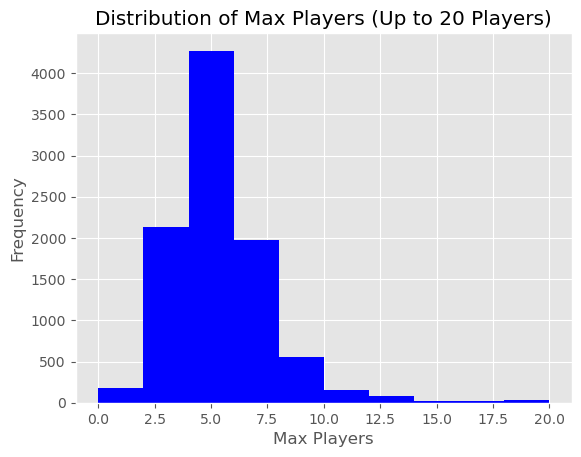

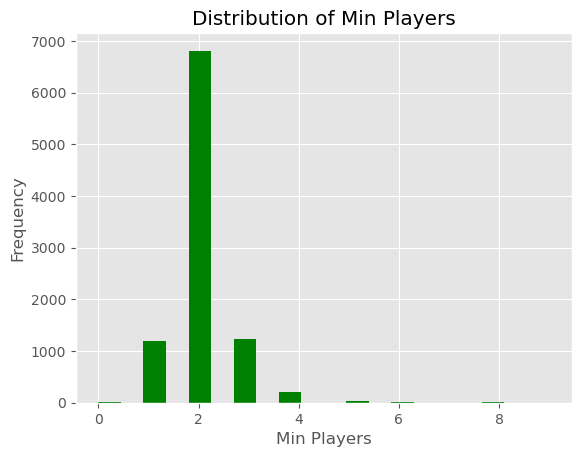

In [22]:
# Filter for player count: max_players <= 20
filtered_players = df[df['max_players'] <= 20]

# Plot distribution for max players (up to 10 players)
filtered_players['max_players'].plot(kind='hist', bins=10, title='Distribution of Max Players (Up to 20 Players)', color='blue')
plt.xlabel('Max Players')
plt.ylabel('Frequency')
plt.show()

# Plot distribution for min players
df['min_players'].plot(kind='hist', bins=20, title='Distribution of Min Players', color='green')
plt.xlabel('Min Players')
plt.ylabel('Frequency')
plt.show()

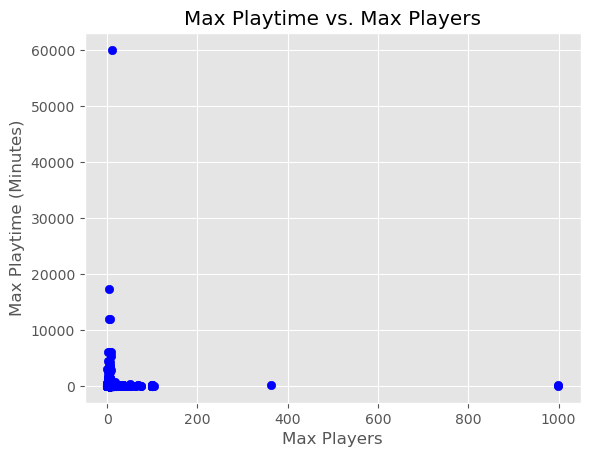

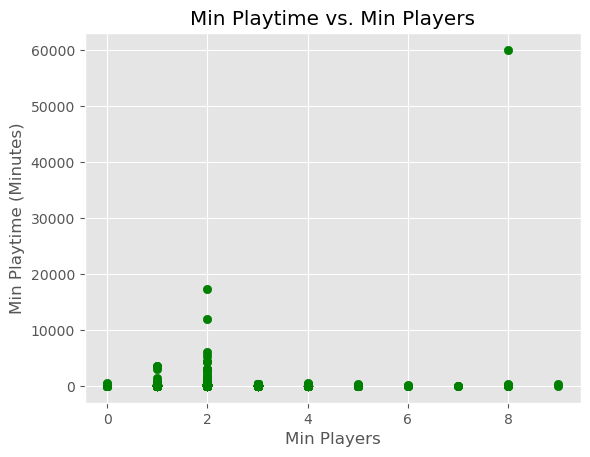

Correlation between Max Players and Max Playtime: -0.0026361289432160475
Correlation between Min Players and Min Playtime: 0.0712215632154235


In [20]:
# Scatter plot to check for correlation between max_playtime and max_players
plt.scatter(df['max_players'], df['max_playtime'], color='blue')
plt.title('Max Playtime vs. Max Players')
plt.xlabel('Max Players')
plt.ylabel('Max Playtime (Minutes)')
plt.show()

# Scatter plot to check for correlation between min_playtime and min_players
plt.scatter(df['min_players'], df['min_playtime'], color='green')
plt.title('Min Playtime vs. Min Players')
plt.xlabel('Min Players')
plt.ylabel('Min Playtime (Minutes)')
plt.show()

# Correlation coefficient between max_playtime and max_players
correlation_max = df[['max_players', 'max_playtime']].corr().iloc[0, 1]
print(f'Correlation between Max Players and Max Playtime: {correlation_max}')

# Correlation coefficient between min_playtime and min_players
correlation_min = df[['min_players', 'min_playtime']].corr().iloc[0, 1]
print(f'Correlation between Min Players and Min Playtime: {correlation_min}')


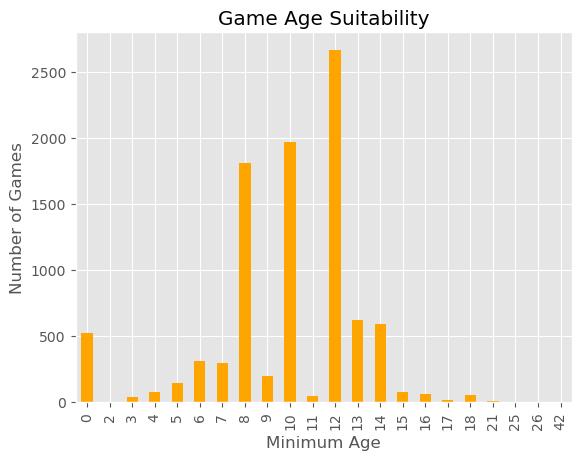

In [11]:
# Age suitability
df['min_age'].value_counts().sort_index().plot(kind='bar', title='Game Age Suitability', color='orange')
plt.xlabel('Minimum Age')
plt.ylabel('Number of Games')
plt.show()

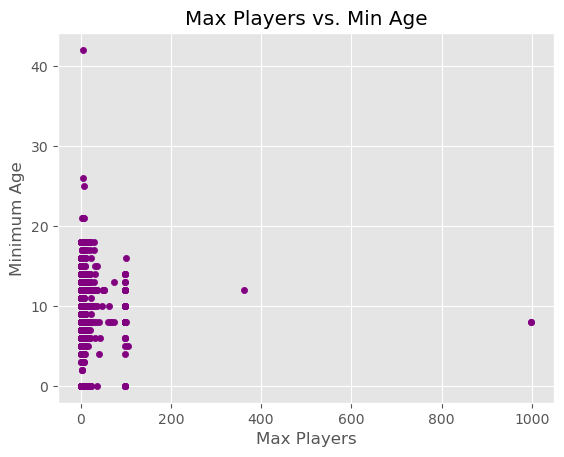

In [12]:
# Plot scatter plot for max players vs min age
df.plot(kind='scatter', x='max_players', y='min_age', title='Max Players vs. Min Age', color='purple')
plt.xlabel('Max Players')
plt.ylabel('Minimum Age')
plt.show()

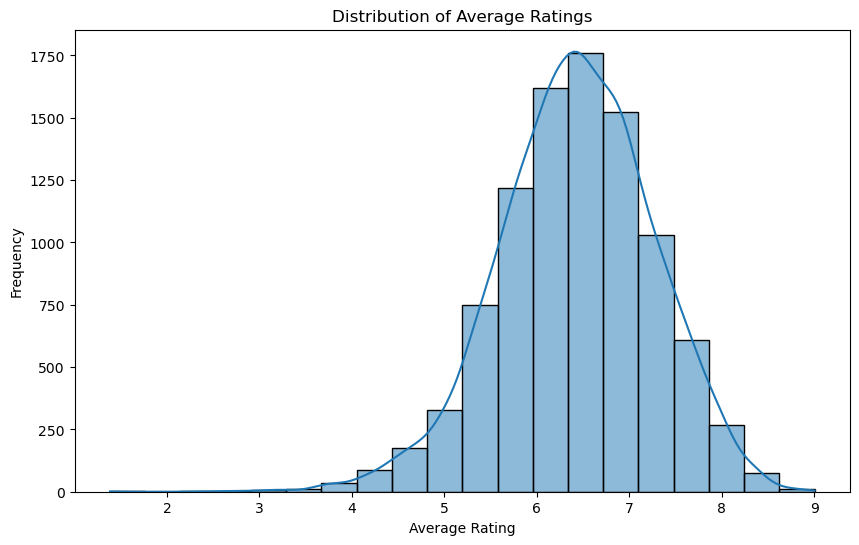

In [5]:
# Histogram for 'average_rating'
plt.figure(figsize=(10, 6))
sns.histplot(df['average_rating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Repeat for other numerical columns as needed

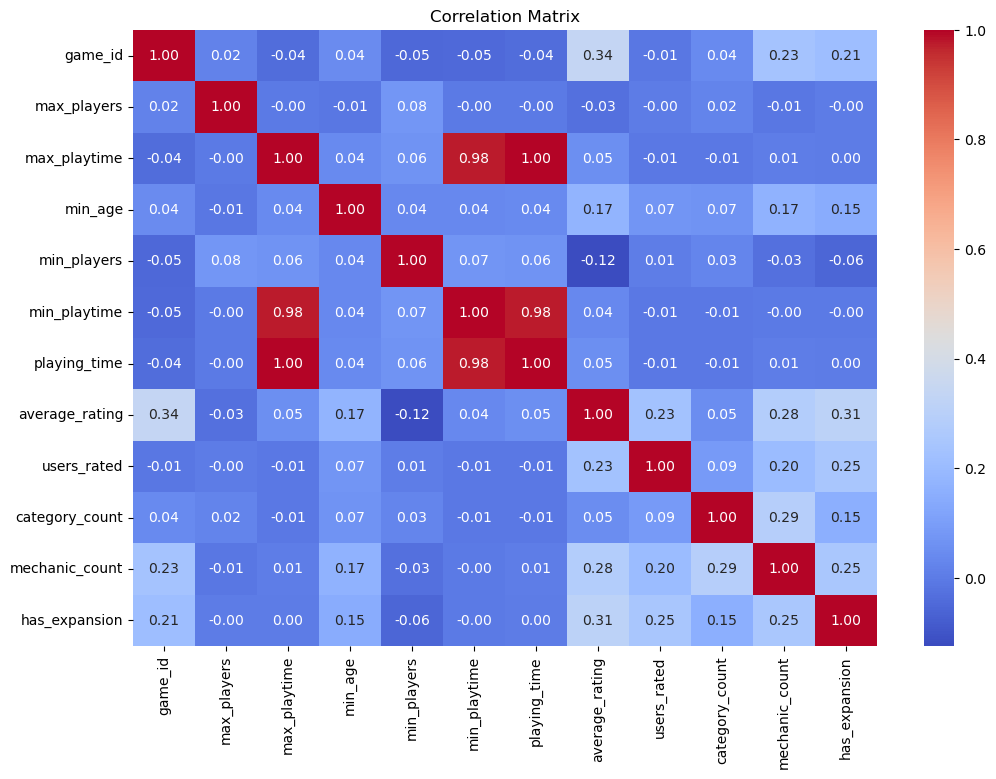

In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Now calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

These box plots illustrate the spread and identify outliers in the average_rating, users_rated, and max_playtime features, showing the central tendency and variability of these features.

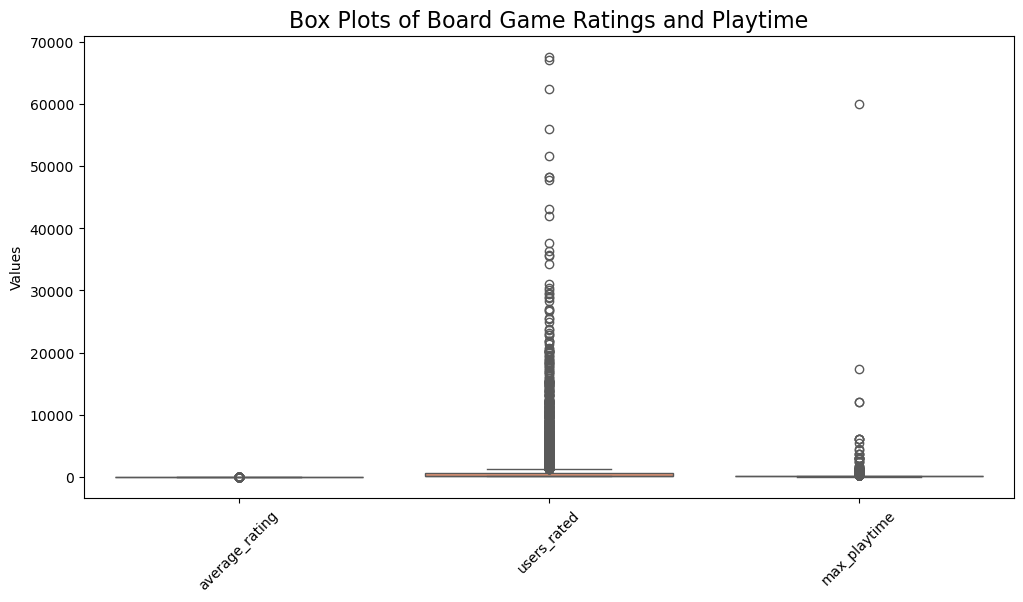

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df[['average_rating', 'users_rated', 'max_playtime']], palette='Set2')
plt.title('Box Plots of Board Game Ratings and Playtime', fontsize=16)
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

This scatter plot visualizes the relationship between average_rating and users_rated, providing insight into how user ratings might correlate with the number of ratings given.

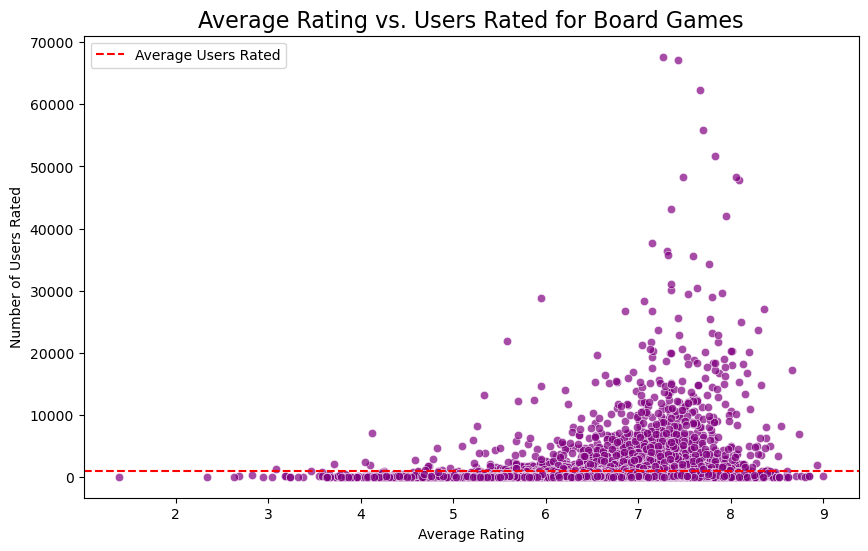

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=numeric_df, x='average_rating', y='users_rated', color='purple', alpha=0.7)
plt.title('Average Rating vs. Users Rated for Board Games', fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Number of Users Rated')
plt.axhline(y=numeric_df['users_rated'].mean(), color='red', linestyle='--', label='Average Users Rated')
plt.legend()
plt.show()


This heatmap displays the correlation matrix for the numeric features, highlighting relationships between different board game characteristics, where colors indicate the strength and direction of correlations.

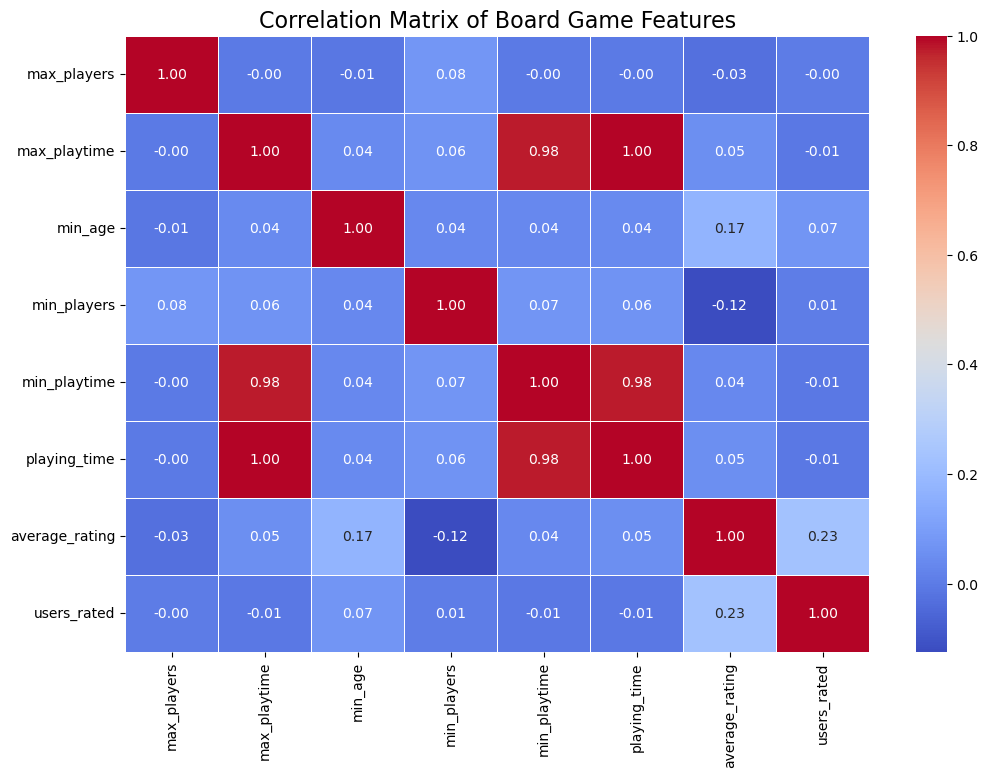

In [9]:
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df[['max_players', 'max_playtime', 'min_age', 'min_players', 'min_playtime', 'playing_time', 'average_rating', 'users_rated']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Board Game Features', fontsize=16)
plt.show()


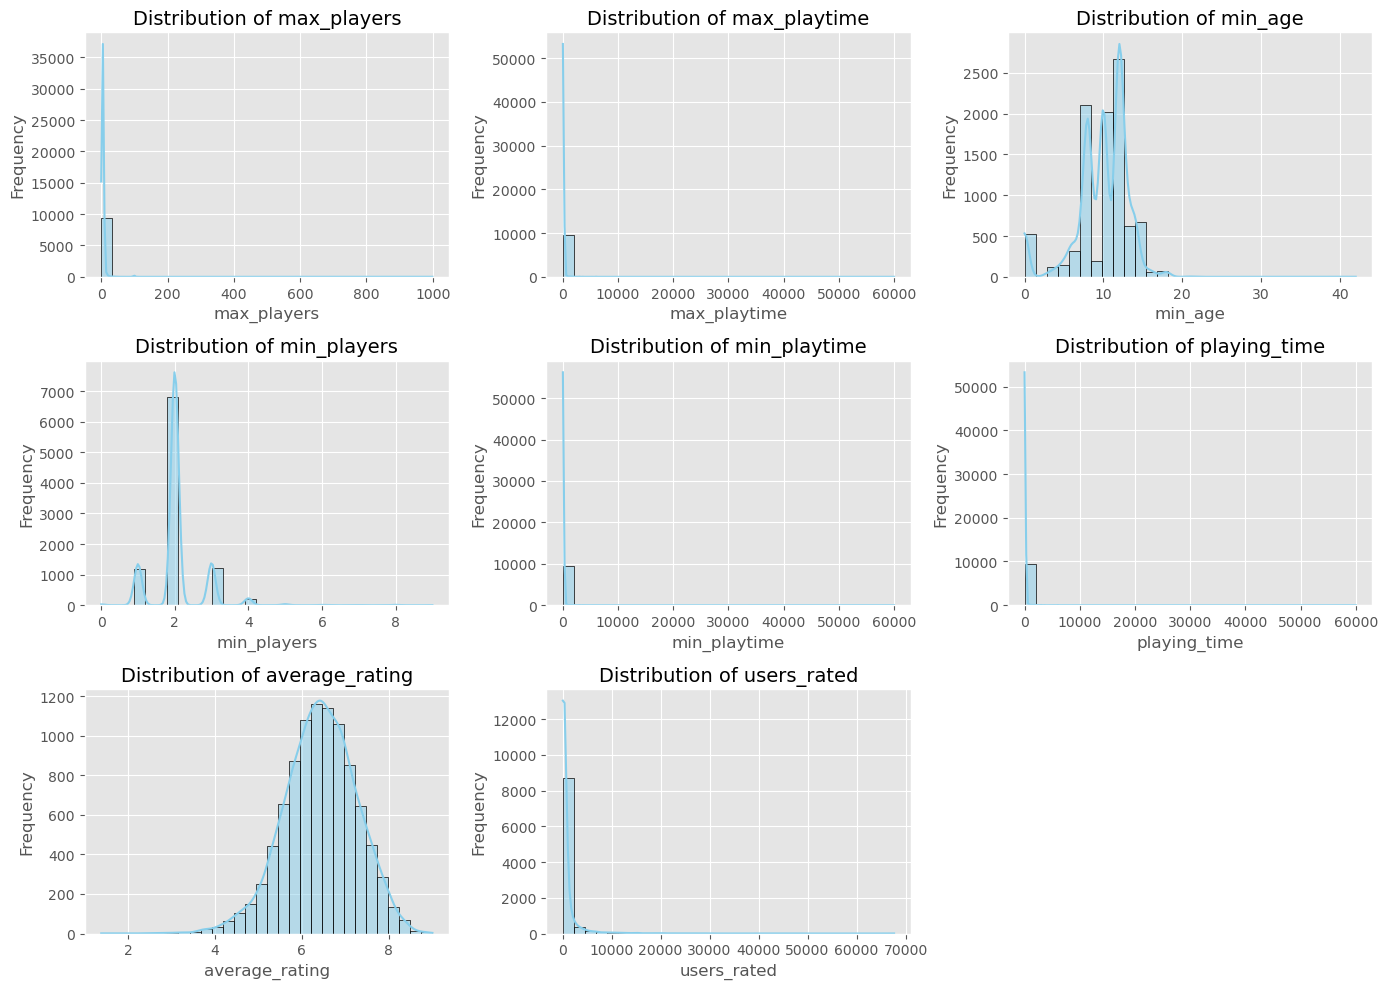

In [10]:
# Use a default Matplotlib style
plt.style.use('ggplot')

# List of numerical columns to plot
numeric_columns = ['max_players', 'max_playtime', 'min_age', 'min_players', 
                   'min_playtime', 'playing_time', 'average_rating', 'users_rated']

# Create histograms for each numerical column
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1) 
    sns.histplot(df[column], bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()



# Report on Board Game Data
This report summarizes key statistics from a dataset of 9,507 board games. The data includes various details such as player counts, playtime, and ratings, providing insights into the characteristics of these games.

Summary Statistics
Game ID: The dataset contains games with ID numbers ranging from 1 to 216,725.
Maximum Players: The average number of players a game can accommodate is approximately 5.4. .
Minimum Players: On average, a game requires at least 2 players to start. There are also games that can be played solo.
Maximum Playtime: The average maximum playtime for these games is about 97 minutes. Yet, there are instances of games showing a maximum playtime of 60,000 minutes, which suggests some data inaccuracies.
Minimum Playtime: The average minimum playtime is around 85 minutes.
Average Rating: Games are rated on average 6.4 out of 10, indicating that many players enjoy these games.
Number of Categories: On average, each game belongs to about 2.7 categories, showing the diversity of game types.
Number of Mechanics: Each game features about 2.5 mechanics that describe how the game is played.
Expansion Packs: Approximately 28% of the games have expansions available for additional content.

Key Observations
The statistics show a wide range of player counts and playtimes among the games. The average player counts suggest many games can be enjoyed with small groups or even solo. The ratings reflect a generally positive reception from players.

In summary, this dataset offers valuable insights into the landscape of board games, highlighting both the diversity in player experience and the general popularity of these games.